# Diabetes Classification Project - Kaggle


### Importing Libraries and Dataset 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as px 
import seaborn as sns
import scipy as sk 
%matplotlib inline

In [2]:
diabetes_dataset_link = r"C:\Users\Akshay Sharma\Documents\GitHub\Diabetes_India_Kaggle\diabetes_dataset.csv"

#### Importing dataset as pandas dataframe

In [3]:
df_diabetes=pd.read_csv(diabetes_dataset_link)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Builing Data-Science Pipeline

## Data Science is OSEMN - So What Exactly is OSEMN??
### O - Obtaining our Data
### S - Scrubbing/Cleaning our Data
### E - Exploring our Data that will allow us to find initial patterns and trends 
### M - Modelling our Data that will give us predictive power 
### N - Interpreting the finding 

#### Since we have already obtained the data from the opensource platform so the next thing we will be doing performing data wrangling and cleaning to make the data more usable.

### Data Wrangling and Cleaning

In [5]:
#Creating a copy of our dataframe
df_diabetes_copy = df_diabetes.copy(deep=True)
df_diabetes_copy.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
#Checking for null values
df_diabetes_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_diabetes_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df_diabetes_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### How can minimum values for Glucose, Blood Pressure, Insulin, BMI etc. can be zero?
### This indicates the missing values for the above columns

### Let's see what options are available to replace the missing values?
#### 1) Drop the entry - Imputation is always preferred then dropping the data
#### 2) Replace the entry with the average of all the data points - or Use median, mode according to the type of data distribution
#### 3) Replace it using some other function - Time Series Specific Methods
#### 4) Replace it using either 0 or some other constant number - Works well for Categorical Values but the issue is that it doesn't factor the correlation between the factors 
#### 5) Leave it as missing data - Some ML algorithms will not work with this option 
#### 6) Imputation using K-Nearest Neighbours - Its much more accurate then all the above options or most imputation methods but the drawback is that its computationally expensive, KNN works by storing the whole dataset in the memory and KNN is quite sensitive to the outliers in the data.

In [9]:
# Since we will be going forward with Replacing the missing values with Mean, Median or Mode and K_Nearest Neighbours since the data set is rather small and then will see which one of these worked best for this dataset 

In [10]:
# Creating another copy of our dataframe
df_diabetes_copy2 = df_diabetes.copy(deep=True)

In [11]:
# Now Replacing the Missing values with Mean,Median or Mode
# First replacing 0 with Numpy NaN, as the 0 values can influence the data distribution of the variables
df_diabetes_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(to_replace=0,value=np.NaN,inplace=True)
df_diabetes_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
## Now the Data Distribution has to be understood so that we can impute the NaN values accordingly

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

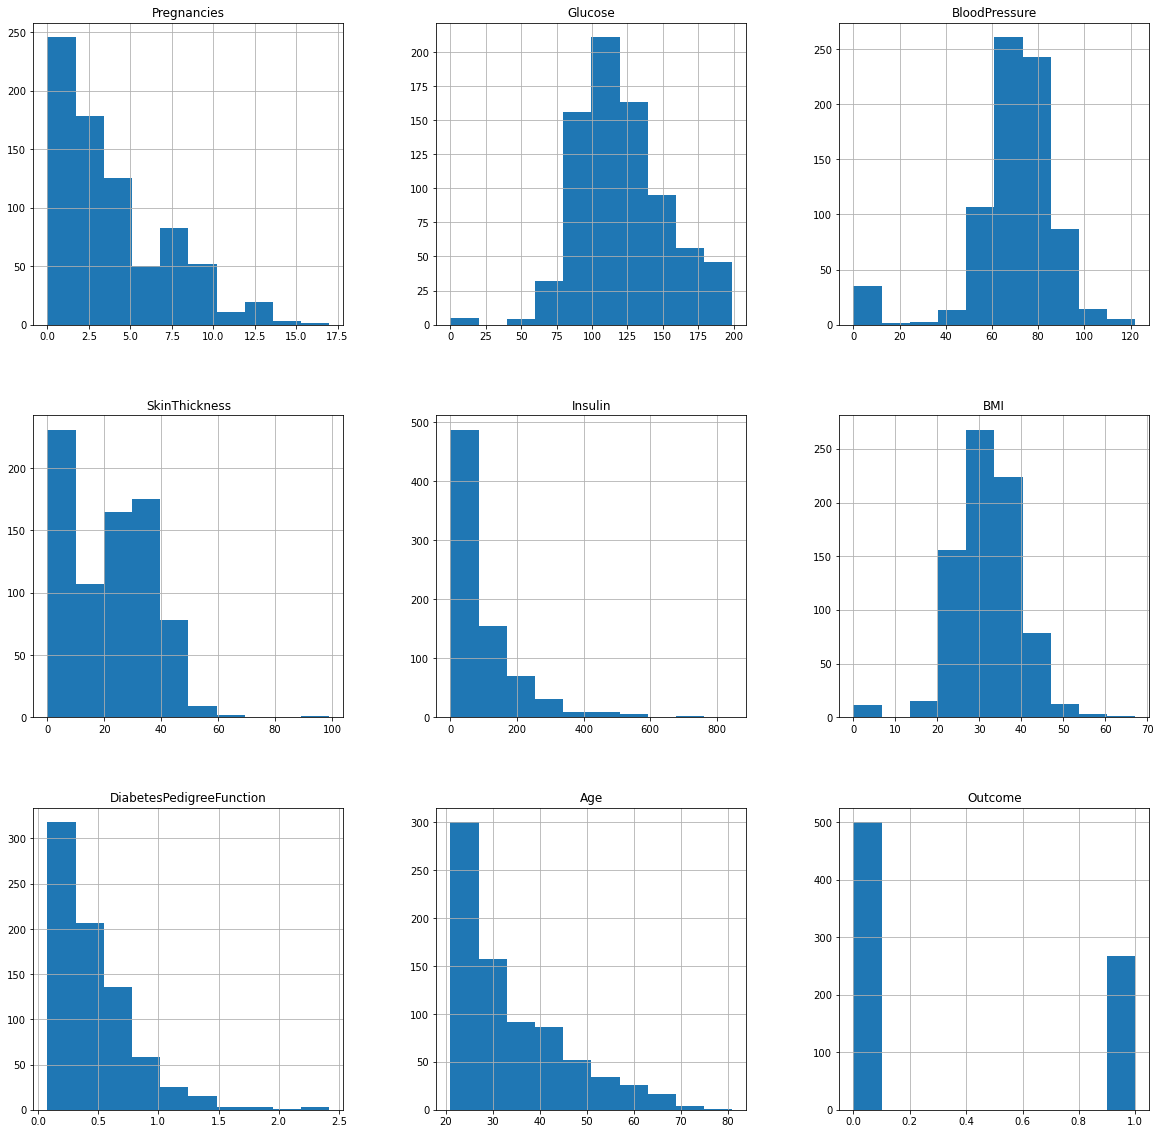

In [13]:
df_diabetes_copy.hist(figsize=(20,20))

In [16]:
## Now the values which are normally distributed can be replaced by mean of the data but for all the other values we will be using the median of the data to replace the missing values.
df_diabetes_copy["Glucose"].fillna(df_diabetes_copy["Glucose"].mean(),inplace=True)
df_diabetes_copy["BloodPressure"].fillna(df_diabetes_copy["BloodPressure"].mean(),inplace=True)
df_diabetes_copy["SkinThickness"].fillna(df_diabetes_copy["SkinThickness"].mean(),inplace=True)
df_diabetes_copy["Insulin"].fillna(df_diabetes_copy["Insulin"].mean(),inplace=True)
df_diabetes_copy["BMI"].fillna(df_diabetes_copy["BMI"].mean(),inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

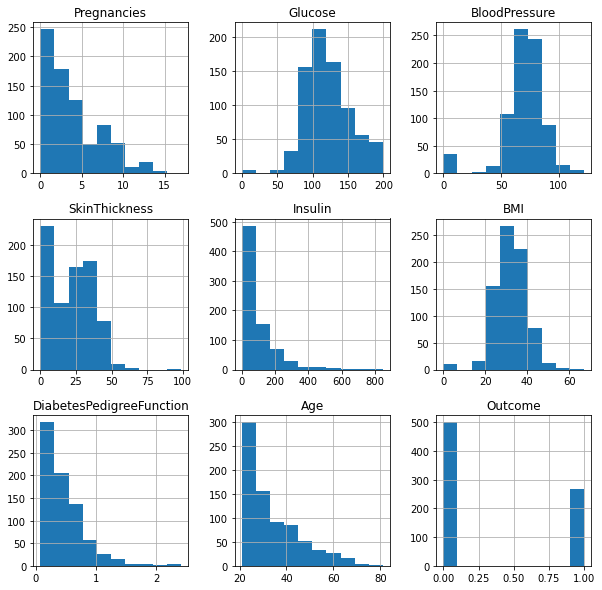

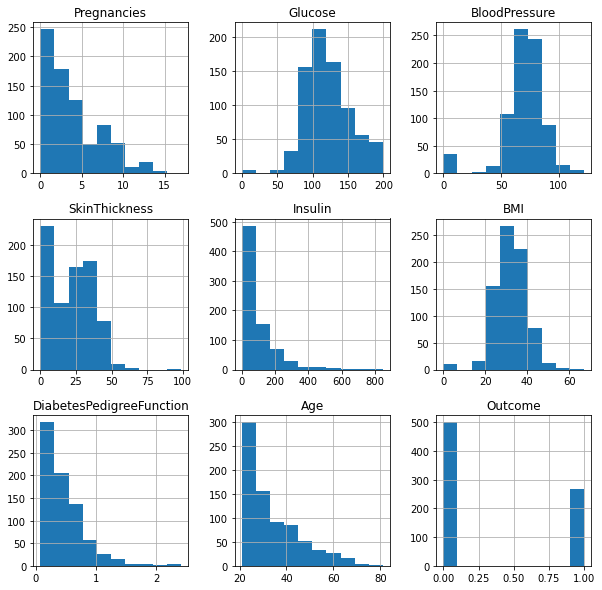

In [22]:
#Plotting after imputing the missing values
df_diabetes_copy.hist(figsize=(10,10))
df_diabetes.hist(figsize=(10,10))

## Now imputing missing values with K_Nearest_Neighbours Algorithm

In [25]:
#Importing the KNN function from Sklearn Library
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X=pd.DataFrame(df_diabetes_copy[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
Y=pd.DataFrame(df_diabetes_copy[["Outcome"]])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

,Outcome
464,0
223,0
393,0
766,1
570,0
...,...
71,0
106,0
270,1
435,1


In [53]:
test_scores = []
train_scores = []

for i in range(1,15):

    model = knn(i)
    model.fit(x_train,y_train)
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))

In [54]:
print("testscore",test_scores)
print("trainscore",train_scores)

testscore [0.6968503937007874, 0.7244094488188977, 0.6732283464566929, 0.7283464566929134, 0.7007874015748031, 0.7125984251968503, 0.6850393700787402, 0.7125984251968503, 0.7165354330708661, 0.7125984251968503, 0.7244094488188977, 0.7401574803149606, 0.7204724409448819, 0.7165354330708661]
trainscore [1.0, 0.8365758754863813, 0.8365758754863813, 0.8054474708171206, 0.7937743190661478, 0.7976653696498055, 0.7937743190661478, 0.7840466926070039, 0.7898832684824902, 0.7762645914396887, 0.7801556420233463, 0.7821011673151751, 0.7782101167315175, 0.7645914396887159]


In [41]:
## Plotting the results

Text(0.5, 1.0, 'Lineplot')

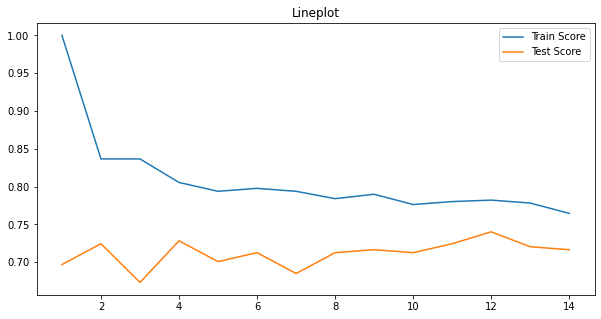

In [61]:
plt.figure(figsize=(10,5))
p=sns.lineplot(range(1,15),train_scores,markers="*",label="Train Score")
p=p=sns.lineplot(range(1,15),test_scores,markers="o",label="Test Score")
plt.title("Lineplot")

## We can see that the test and train score are the lowest when n=12
### Now we will use Cross Validation to see if similar results are obtained.

In [65]:
#importing function from the Library
from sklearn import cross_validation

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [64]:
kf=KFold(n_splits=4)